In [129]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [103]:
# load and read the dataset into a DataFrame
df = pd.read_csv('D:\Anaconda\CAPSTONE\consolidated_philippines_poverty_data.csv')

# Display the first few ros of the dataset
df.head()

,regDesc,agr_wage_farm_workers_allgender_2015,agr_wage_farm_workers_male_2015,agr_wage_farm_workers_female_2015,avg_annual_total_incm_farm_households_02_03,avg_annual_farm_incm_farm_households_02_03,avg_annual_off_farm_incm_farm_households_02_03,avg_annual_non_farm_incm_farm_households_02_03,avg_annual_other_sources_incm_farm_households_02_03,avg_rural_income_2000,total_emply_2016
0,Armm,162.89,163.65,103.81,73356,34026,5737,24936,8657,73673.0,1140
1,Bicol Region,167.99,169.95,119.52,82988,36579,7348,30381,8680,72626.0,2331
2,Cagayan Valley,228.77,232.64,199.98,145809,87353,6909,39894,11653,94212.0,1482
3,Calabarzon,230.92,231.45,172.04,143075,64498,8444,48590,21543,NaN,5687
4,Car,206.68,211.04,195.62,127067,71142,9731,37178,9016,95635.0,765


In [104]:
# Check for missing values 
df.isnull().sum()

# Handle missing values (if any)
df.dropna(inplace=True)

# Check for duplicate rows
df.duplicated().sum()

# Drop duplicates if any
df = df.drop_duplicates()

In [105]:
df

,regDesc,agr_wage_farm_workers_allgender_2015,agr_wage_farm_workers_male_2015,agr_wage_farm_workers_female_2015,avg_annual_total_incm_farm_households_02_03,avg_annual_farm_incm_farm_households_02_03,avg_annual_off_farm_incm_farm_households_02_03,avg_annual_non_farm_incm_farm_households_02_03,avg_annual_other_sources_incm_farm_households_02_03,avg_rural_income_2000,total_emply_2016
0,Armm,162.89,163.65,103.81,73356,34026,5737,24936,8657,73673.0,1140
1,Bicol Region,167.99,169.95,119.52,82988,36579,7348,30381,8680,72626.0,2331
2,Cagayan Valley,228.77,232.64,199.98,145809,87353,6909,39894,11653,94212.0,1482
4,Car,206.68,211.04,195.62,127067,71142,9731,37178,9016,95635.0,765
5,Caraga,194.46,195.44,187.78,84569,54004,11118,13892,5555,63574.0,1086
6,Central Luzon,257.97,259.04,204.73,158130,85048,6073,50413,16596,125626.0,4363
7,Central Visayas,156.17,160.65,150.67,72177,28074,5574,31055,7474,68447.0,3234
8,Davao Region,168.68,169.83,158.91,101673,69496,5593,17573,9011,79983.0,2016
9,Eastern Visayas,157.49,159.25,112.22,82503,47359,6066,23812,5266,68077.0,1790
10,Ilocos Region,237.26,239.19,199.04,118637,51544,4358,36054,26681,103915.0,1988


In [106]:
# Perfrom descriptive statistics
print("\nDescriptive Statistics of the Dataset: ")
df.describe()


Descriptive Statistics of the Dataset: 


,agr_wage_farm_workers_allgender_2015,agr_wage_farm_workers_male_2015,agr_wage_farm_workers_female_2015,avg_annual_total_incm_farm_households_02_03,avg_annual_farm_incm_farm_households_02_03,avg_annual_off_farm_incm_farm_households_02_03,avg_annual_non_farm_incm_farm_households_02_03,avg_annual_other_sources_incm_farm_households_02_03,avg_rural_income_2000,total_emply_2016
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,184.635714,186.701429,160.897143,103063.571429,56738.928571,6771.571429,29809.142857,9743.928571,81004.500000,2057.214286
std,34.410445,34.589990,33.346374,28617.112599,19667.102146,2006.694094,9684.891500,5758.176654,17673.766625,971.735100
min,156.170000,158.550000,103.810000,72177.000000,28074.000000,4256.000000,13892.000000,4776.000000,63574.000000,765.000000
25%,160.062500,161.400000,150.850000,82350.000000,42789.250000,5629.000000,23412.250000,6128.750000,69491.750000,1496.500000
50%,166.635000,168.800000,157.935000,91948.000000,52774.000000,6069.500000,30718.000000,8668.500000,73819.500000,1921.000000
75%,203.625000,207.140000,193.660000,124959.500000,70730.500000,7238.250000,35455.000000,9877.750000,90654.750000,2252.250000
max,257.970000,259.040000,204.730000,158130.000000,87353.000000,11118.000000,50413.000000,26681.000000,125626.000000,4363.000000


### 1. Linear Regression Model

In [107]:
#Implementing linear regression model to analyze relationships between variables

# Define variables
var1 = 'agr_wage_farm_workers_allgender_2015'
var2 = 'avg_annual_farm_incm_farm_households_02_03'

# Implement linear regression to selected features
X = df[[var1]]
y = df[[var2]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 116395204.90514195


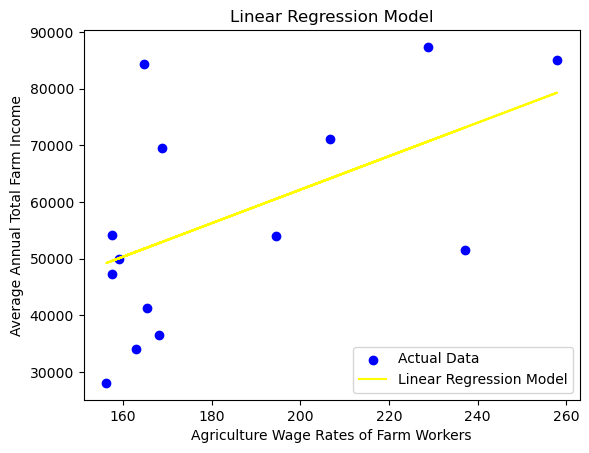

In [108]:
# Visualize the relation between variable1 and variable2
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='yellow', label='Linear Regression Model')
plt.title('Linear Regression Model')
plt.xlabel('Agriculture Wage Rates of Farm Workers')
plt.ylabel('Average Annual Total Farm Income')
plt.legend()
plt.show()

In [109]:
#Implementing linear regression model to analyze relationships between variables

# Define variables
var3 = 'avg_annual_non_farm_incm_farm_households_02_03'
var4 = 'avg_rural_income_2000'

# Implement linear regression to selected features
X = df[[var3]]
y = df[[var4]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 114552777.79321332


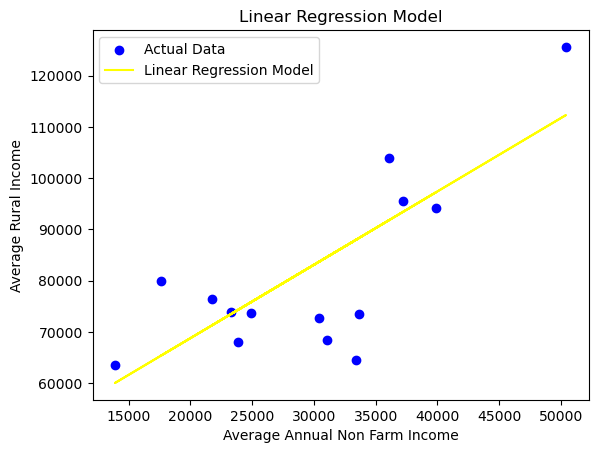

In [110]:
# Visualize the relation between variable3 and variable4
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='yellow', label='Linear Regression Model')
plt.title('Linear Regression Model')
plt.xlabel('Average Annual Non Farm Income')
plt.ylabel('Average Rural Income')
plt.legend()
plt.show()

In [111]:
#Implementing linear regression model to analyze relationships between variables

# Define variables
var5 = 'total_emply_2016'
var6 = 'avg_annual_total_incm_farm_households_02_03'

# Implement linear regression to selected features
X = df[[var5]]
y = df[[var6]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 991171396.6819845


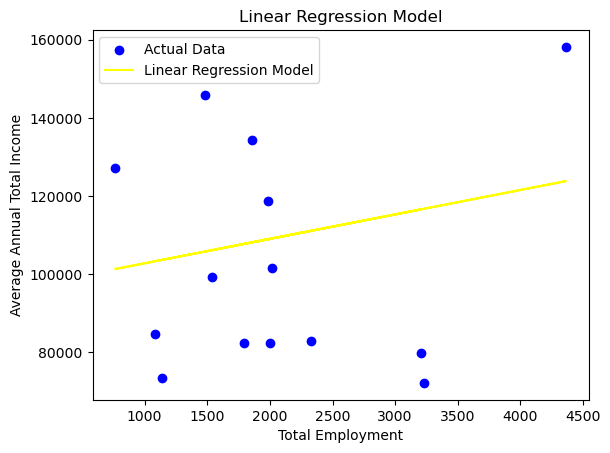

In [112]:
# Visualize the relation between variable5 and variable6
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='yellow', label='Linear Regression Model')
plt.title('Linear Regression Model')
plt.xlabel('Total Employment')
plt.ylabel('Average Annual Total Income')
plt.legend()
plt.show()

### 2. Classification Model (Decision Tree Model)

In [113]:
#Implementing Decision Tree Classification model to analyze relationships between variables

# Define variables
var1 = 'agr_wage_farm_workers_allgender_2015'
var2 = 'avg_annual_farm_incm_farm_households_02_03'

# Implement Decision Tree Classification model to selected features
X = df[[var1]]
y = (df[[var2]] > df[[var2]].median()).astype(int) # Convert to binary based on median

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6666666666666666


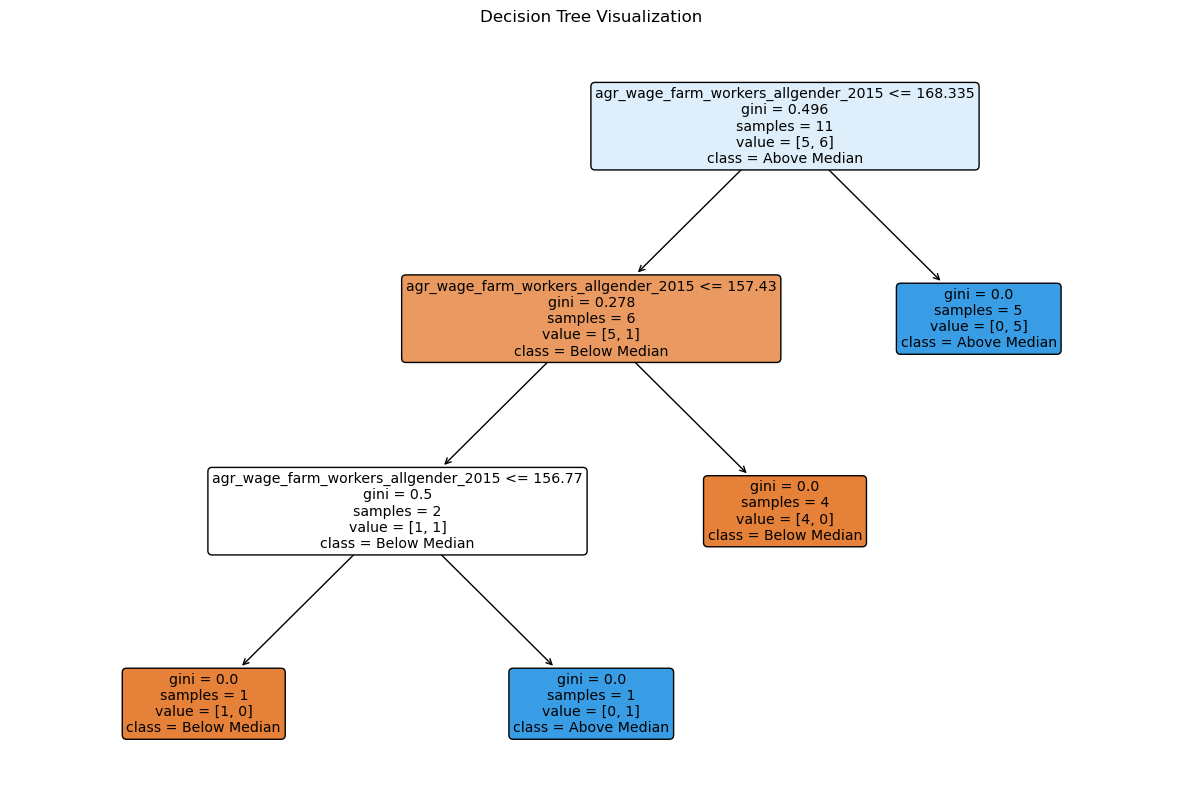

In [114]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=['Below Median', 'Above Median'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [117]:
#Implementing Decision Tree Classification model to analyze relationships between variables

# Define variables
var3 = 'avg_annual_non_farm_incm_farm_households_02_03'
var4 = 'avg_rural_income_2000'

# Implement Decision Tree Classification model to selected features
X = df[[var3]]
y = (df[[var4]] > df[[var4]].median()).astype(int) # Convert to binary based on median

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


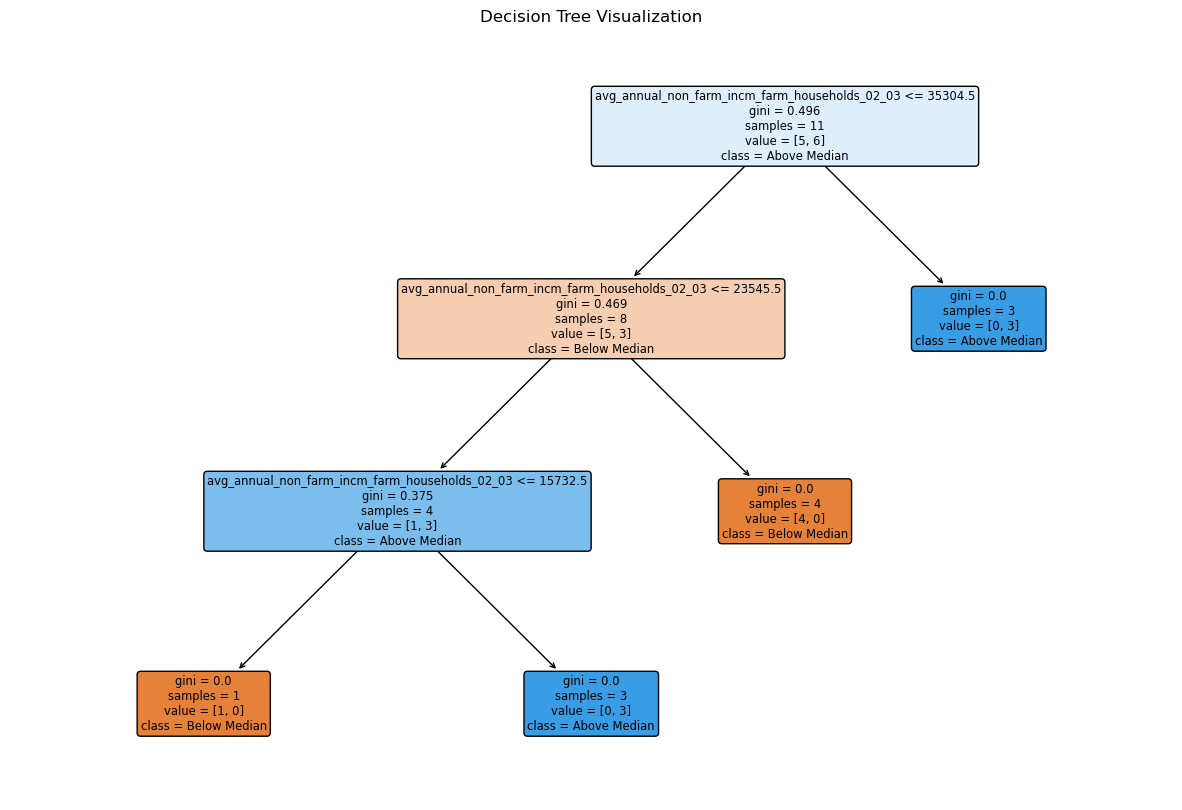

In [118]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=['Below Median', 'Above Median'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [136]:
#Implementing Decision Tree Classification model to analyze relationships between variables

# Define variables
var5 = 'total_emply_2016'
var6 = 'avg_annual_total_incm_farm_households_02_03'

# Implement Decision Tree Classification model to selected features
X = df[[var5]]
y = (df[[var6]] > df[[var6]].median()).astype(int) # Convert to binary based on median

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6666666666666666


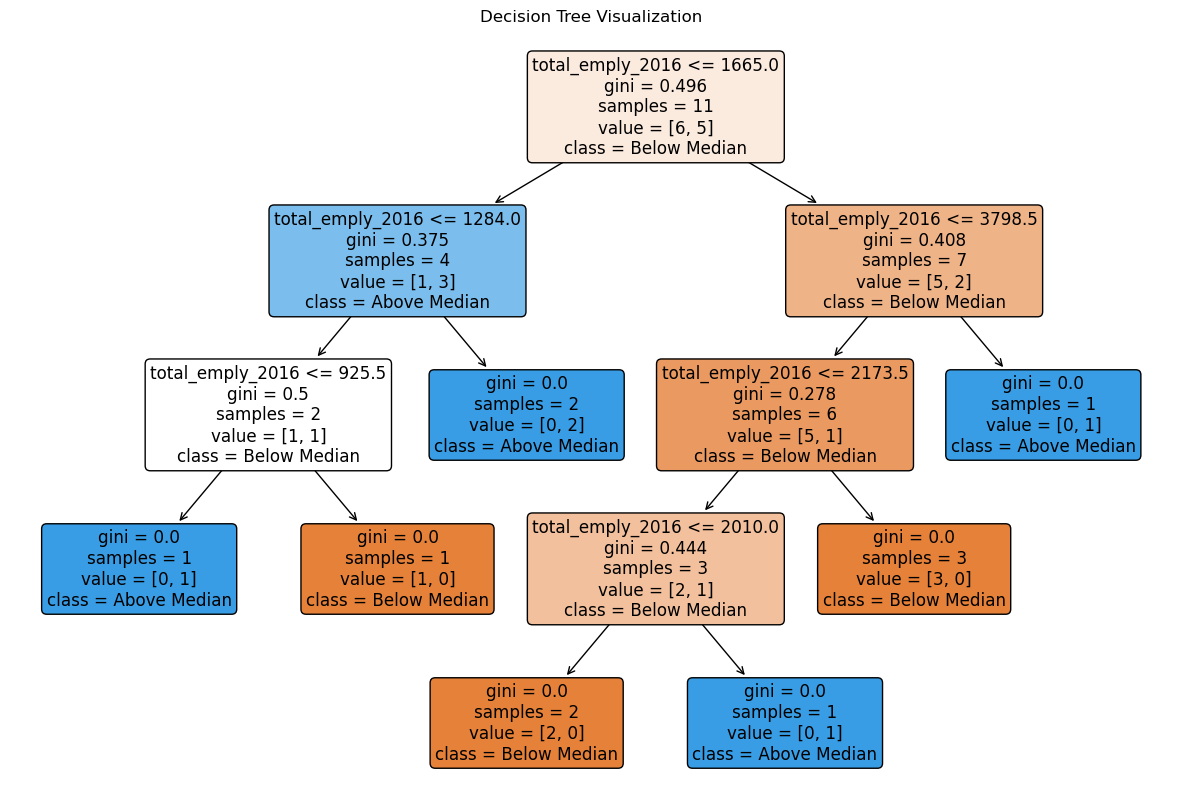

In [137]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=['Below Median', 'Above Median'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()